In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import math
import os
import seaborn as sn
import glob
from google.colab import drive
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, GlobalAveragePooling1D, Dropout, Flatten, AvgPool1D, AvgPool2D, LSTM, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from keras import optimizers
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

#Pre-Processing of Data

In [ ]:
flight_data = pd.read_csv(r'/content/drive/MyDrive/cps/ML-Projects-master/dataset.csv')

In [ ]:
flight_data.info()
print(flight_data.shape)
print(flight_data.columns)
pd.isnull(flight_data).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37731 entries, 0 to 37730
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AIRLINE                   37731 non-null  object 
 1   FROM_JFK                  37731 non-null  object 
 2   TO JFK                    37731 non-null  object 
 3   SCHEDULED_DEPARTURE_TIME  37731 non-null  float64
 4   FEDERAL_HOLIDAY           1132 non-null   float64
 5   STATE_HOLIDAY             577 non-null    float64
 6   WEEKEND                   16393 non-null  float64
 7   LONG_WEEKEND              2050 non-null   float64
 8   WIND_DIRECTION            37731 non-null  int64  
 9   WIND SPEED                37731 non-null  int64  
 10  ALTIMETER                 37731 non-null  float64
 11  0.0slp                    37731 non-null  float64
 12  t0.0pc                    37731 non-null  float64
 13  VISIBILITY                37731 non-null  float64
 14  DEPART

AIRLINE                         0
FROM_JFK                        0
TO JFK                          0
SCHEDULED_DEPARTURE_TIME        0
FEDERAL_HOLIDAY             36599
STATE_HOLIDAY               37154
WEEKEND                     21338
LONG_WEEKEND                35681
WIND_DIRECTION                  0
WIND SPEED                      0
ALTIMETER                       0
0.0slp                          0
t0.0pc                          0
VISIBILITY                      0
DEPARTURE_TIME                  0
SCHEDULED_ARRIVAL               0
ARRIVAL_TIME                    0
SCHEDULED_TIME                  0
ELAPSED_TIME                    0
DEPARTURE_DELAY                 0
ARRIVAL_DELAY                   0
AIR_SYSTEM_DELAY                0
SECURITY_DELAY                  0
AIRLINE_DELAY                   0
LATE_AIRCRAFT_DELAY             0
WEATHER_DELAY                   0
CANCELLED                       0
dtype: int64

In [ ]:
flight_data = flight_data.fillna(int(0))

In [ ]:
print(flight_data['STATE_HOLIDAY'])

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
37726    0.0
37727    0.0
37728    0.0
37729    0.0
37730    0.0
Name: STATE_HOLIDAY, Length: 37731, dtype: float64


In [ ]:
for i in range(flight_data.shape[0]):
  column = str(flight_data.iloc[i, 1])
  if column == 'JFK':
    flight_data.iloc[i, 1] = int(1)
  else:
    flight_data.iloc[i, 1] = int(0)
    
for i in range(flight_data.shape[0]):
  column = str(flight_data.iloc[i, 2])
  if column == 'JFK':
    flight_data.iloc[i, 2] = int(1)
  else:
    flight_data.iloc[i, 2] = int(0)

In [ ]:
print(flight_data.shape[0])
print(flight_data.iloc[2,10])

37731
30.16


In [ ]:
drop_column = ['AIRLINE']
flight_data = flight_data.drop(drop_column, axis = 1)


In [ ]:
print(flight_data.columns)

Index(['FROM_JFK', 'TO JFK', 'SCHEDULED_DEPARTURE_TIME', 'FEDERAL_HOLIDAY',
       'STATE_HOLIDAY', 'WEEKEND', 'LONG_WEEKEND', 'WIND_DIRECTION',
       'WIND SPEED ', 'ALTIMETER', '0.0slp', 't0.0pc', 'VISIBILITY',
       'DEPARTURE_TIME', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'SCHEDULED_TIME',
       'ELAPSED_TIME', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
       'WEATHER_DELAY', 'CANCELLED'],
      dtype='object')


In [ ]:
flight_data[['FROM_JFK', 'TO JFK', 'FEDERAL_HOLIDAY', 'STATE_HOLIDAY', 'WEEKEND', 'LONG_WEEKEND']] = flight_data[['FROM_JFK', 'TO JFK', 'FEDERAL_HOLIDAY', 'STATE_HOLIDAY', 'WEEKEND', 'LONG_WEEKEND']].apply(pd.to_numeric)

In [ ]:
print(flight_data['DEPARTURE_DELAY'])

0        -2
1        -5
2        -7
3        43
4        55
         ..
37726    -8
37727    -6
37728    -9
37729    -9
37730    -3
Name: DEPARTURE_DELAY, Length: 37731, dtype: int64


In [ ]:
EARLY_DEPARTURE = []
EARLY_ARRIVAL = []
for column_number in range(18, 26):
  for i in range(flight_data.shape[0]):
    column_value = flight_data.iloc[i, column_number]
    if column_value > 0:
      flight_data.iloc[i, column_number] = int(1)
      if column_number == 18:
        EARLY_DEPARTURE.append(0)
      elif column_number == 19:
        EARLY_ARRIVAL.append(0)

    else:
      if column_number == 18:
        EARLY_DEPARTURE.append(1)
      elif column_number == 19:
        EARLY_ARRIVAL.append(1)
      flight_data.iloc[i, column_number] = int(0)
flight_data["EARLY_DEPARTURE"] = EARLY_DEPARTURE
flight_data["EARLY_ARRIVAL"] = EARLY_ARRIVAL

In [ ]:
flight_data.dtypes

FROM_JFK                      int64
TO JFK                        int64
SCHEDULED_DEPARTURE_TIME    float64
FEDERAL_HOLIDAY             float64
STATE_HOLIDAY               float64
WEEKEND                     float64
LONG_WEEKEND                float64
WIND_DIRECTION                int64
WIND SPEED                    int64
ALTIMETER                   float64
0.0slp                      float64
t0.0pc                      float64
VISIBILITY                  float64
DEPARTURE_TIME              float64
SCHEDULED_ARRIVAL           float64
ARRIVAL_TIME                float64
SCHEDULED_TIME                int64
ELAPSED_TIME                  int64
DEPARTURE_DELAY               int64
ARRIVAL_DELAY                 int64
AIR_SYSTEM_DELAY              int64
SECURITY_DELAY                int64
AIRLINE_DELAY                 int64
LATE_AIRCRAFT_DELAY           int64
WEATHER_DELAY                 int64
CANCELLED                     int64
EARLY_DEPARTURE               int64
EARLY_ARRIVAL               

In [ ]:
flight_data.to_csv(r'/content/drive/MyDrive/cps/ML-Projects-master/data.csv')

In [ ]:
test_data = flight_data.columns[18:]
X = flight_data.copy(deep = True)
X = X.drop(test_data,  axis = 1)
Y = flight_data[test_data]
Y = Y.drop(["EARLY_ARRIVAL", "EARLY_DEPARTURE"], axis = 1)

In [ ]:
print(X)

       FROM_JFK  TO JFK  ...  SCHEDULED_TIME  ELAPSED_TIME
0             0       1  ...             235           248
1             0       1  ...              88            78
2             0       1  ...              85            67
3             1       0  ...             225           201
4             1       0  ...             185           199
...         ...     ...  ...             ...           ...
37726         1       0  ...             347           338
37727         0       1  ...             212           196
37728         1       0  ...             395           370
37729         0       1  ...              89            81
37730         1       0  ...             235           218

[37731 rows x 18 columns]


In [ ]:
#Centralizing the Data Using Standard Scaler
X = np.array(X)
Y = np.array(Y)
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
print(X)

[[-1.00039763  1.00039763 -2.305589   ... -1.27045671  0.10656148
   0.35580707]
 [-1.00039763  1.00039763 -1.59504119 ... -1.02530409 -1.24190594
  -1.08928869]
 [-1.00039763  1.00039763 -1.59504119 ... -1.06032589 -1.26942568
  -1.18279488]
 ...
 [ 0.99960253 -0.99960253 -0.69501397 ... -0.11473722  1.57428112
   1.39287579]
 [-1.00039763  1.00039763 -0.69501397 ... -0.35988984 -1.23273269
  -1.063787  ]
 [ 0.99960253 -0.99960253 -0.69501397 ... -0.00967181  0.10656148
   0.10079017]]


In [ ]:
X_train, X_dev, Y_train, Y_dev = train_test_split(X, Y, test_size = 0.15, random_state =777)
X_dev, X_test, Y_dev, Y_test = train_test_split(X_dev, Y_dev, test_size = 0.2, random_state = 777)

In [ ]:
print(X_train.shape,Y_train.shape)
print(X_dev.shape,Y_dev.shape)
print(X_test.shape,Y_test.shape)

(32071, 18) (32071, 8)
(4528, 18) (4528, 8)
(1132, 18) (1132, 8)


In [ ]:
model = Sequential()
model.add(Dense(60, input_dim = 18, kernel_regularizer=l2(1e-1), activation='relu'))
model.add(Dense(180, kernel_regularizer=l2(1e-1), activation= 'relu'))
model.add(Dense(320, kernel_regularizer=l2(1e-1), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(320, kernel_regularizer=l2(1e-1), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(160, kernel_regularizer=l2(1e-1), activation='relu'))
model.add(Dense(80, kernel_regularizer=l2(1e-1), activation='relu'))
model.add(Dense(40, kernel_regularizer=l2(1e-1), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(20, kernel_regularizer=l2(1e-1), activation='relu'))
model.add(Dense(18, kernel_regularizer=l2(1e-1), activation= 'relu'))
model.add(Dense(14, kernel_regularizer=l2(1e-1),  activation='relu'))
model.add(Dense(12, kernel_regularizer=l2(1e-1),  activation='relu'))
model.add(Dense(8, kernel_regularizer=l2(1e-1),  activation='sigmoid'))


sgd = SGD(lr = 0.00001, momentum = 0.009 ,clipvalue = 5, nesterov = True)
model.compile(loss= 'binary_crossentropy', optimizer = sgd, metrics=['accuracy'])
checkpointer = EarlyStopping(monitor='val_loss',mode='min')
model_history = model.fit(X_train, Y_train, epochs = 50, validation_data = (X_dev, Y_dev), verbose = 2, callbacks = [checkpointer])

Epoch 1/50
1003/1003 - 6s - loss: 113.1207 - accuracy: 0.0000e+00 - val_loss: 112.8917 - val_accuracy: 0.0000e+00
Epoch 2/50
1003/1003 - 3s - loss: 112.6662 - accuracy: 0.0000e+00 - val_loss: 112.4383 - val_accuracy: 0.0000e+00
Epoch 3/50
1003/1003 - 3s - loss: 112.2136 - accuracy: 3.1181e-05 - val_loss: 111.9866 - val_accuracy: 0.0000e+00
Epoch 4/50
1003/1003 - 3s - loss: 111.7629 - accuracy: 3.1181e-05 - val_loss: 111.5368 - val_accuracy: 0.0000e+00
Epoch 5/50
1003/1003 - 3s - loss: 111.3139 - accuracy: 1.2472e-04 - val_loss: 111.0888 - val_accuracy: 0.0000e+00
Epoch 6/50
1003/1003 - 4s - loss: 110.8668 - accuracy: 3.4299e-04 - val_loss: 110.6426 - val_accuracy: 0.0000e+00
Epoch 7/50
1003/1003 - 3s - loss: 110.4215 - accuracy: 6.2362e-04 - val_loss: 110.1982 - val_accuracy: 0.0000e+00
Epoch 8/50
1003/1003 - 3s - loss: 109.9779 - accuracy: 9.6661e-04 - val_loss: 109.7555 - val_accuracy: 0.0000e+00
Epoch 9/50
1003/1003 - 3s - loss: 109.5363 - accuracy: 0.0014 - val_loss: 109.3146 - val

In [ ]:
model_history1 = model.fit(X_train, Y_train, epochs = 250, validation_data = (X_dev, Y_dev), verbose = 2, callbacks = [checkpointer])

Epoch 1/250
1003/1003 - 4s - loss: 92.5108 - accuracy: 0.2255 - val_loss: 92.3239 - val_accuracy: 0.3712
Epoch 2/250
1003/1003 - 3s - loss: 92.1396 - accuracy: 0.2403 - val_loss: 91.9535 - val_accuracy: 0.4335
Epoch 3/250
1003/1003 - 3s - loss: 91.7699 - accuracy: 0.2594 - val_loss: 91.5846 - val_accuracy: 0.4901
Epoch 4/250
1003/1003 - 3s - loss: 91.4018 - accuracy: 0.2892 - val_loss: 91.2172 - val_accuracy: 0.5475
Epoch 5/250
1003/1003 - 3s - loss: 91.0351 - accuracy: 0.3191 - val_loss: 90.8513 - val_accuracy: 0.6014
Epoch 6/250
1003/1003 - 3s - loss: 90.6699 - accuracy: 0.3395 - val_loss: 90.4869 - val_accuracy: 0.6533
Epoch 7/250
1003/1003 - 3s - loss: 90.3061 - accuracy: 0.3738 - val_loss: 90.1239 - val_accuracy: 0.6924
Epoch 8/250
1003/1003 - 3s - loss: 89.9439 - accuracy: 0.4046 - val_loss: 89.7624 - val_accuracy: 0.7261
Epoch 9/250
1003/1003 - 3s - loss: 89.5832 - accuracy: 0.4414 - val_loss: 89.4023 - val_accuracy: 0.7515
Epoch 10/250
1003/1003 - 3s - loss: 89.2237 - accuracy:

In [ ]:
model_history2 = model.fit(X_train, Y_train, epochs = 80, validation_data = (X_dev, Y_dev), verbose = 2, callbacks = [checkpointer])

Epoch 1/80
1003/1003 - 4s - loss: 34.0261 - accuracy: 0.8187 - val_loss: 33.9582 - val_accuracy: 0.8198
Epoch 2/80
1003/1003 - 3s - loss: 33.8912 - accuracy: 0.8187 - val_loss: 33.8235 - val_accuracy: 0.8198
Epoch 3/80
1003/1003 - 3s - loss: 33.7567 - accuracy: 0.8187 - val_loss: 33.6893 - val_accuracy: 0.8198
Epoch 4/80
1003/1003 - 3s - loss: 33.6229 - accuracy: 0.8187 - val_loss: 33.5557 - val_accuracy: 0.8198
Epoch 5/80
1003/1003 - 3s - loss: 33.4895 - accuracy: 0.8187 - val_loss: 33.4226 - val_accuracy: 0.8198
Epoch 6/80
1003/1003 - 4s - loss: 33.3567 - accuracy: 0.8187 - val_loss: 33.2901 - val_accuracy: 0.8198
Epoch 7/80
1003/1003 - 3s - loss: 33.2243 - accuracy: 0.8187 - val_loss: 33.1580 - val_accuracy: 0.8198
Epoch 8/80
1003/1003 - 3s - loss: 33.0926 - accuracy: 0.8187 - val_loss: 33.0266 - val_accuracy: 0.8198
Epoch 9/80
1003/1003 - 3s - loss: 32.9614 - accuracy: 0.8187 - val_loss: 32.8956 - val_accuracy: 0.8198
Epoch 10/80
1003/1003 - 3s - loss: 32.8307 - accuracy: 0.8187 - 

In [ ]:
_, test_accuracy = model.evaluate(X_test, Y_test)
print("Test Accuracy is: " + str(test_accuracy * 100)+ str("%"))


36/36 [==============================] - 0s 2ms/step - loss: 24.8311 - accuracy: 0.8233
Test Accuracy is: 82.33215808868408%


In [ ]:
alternate_model = Sequential()
alternate_model.add(Dense(60, input_dim = 18, kernel_regularizer=l2(1e-1), activation='relu'))
alternate_model.add(Dense(180, kernel_regularizer=l2(1e-1), activation= 'relu'))
alternate_model.add(Dense(320, kernel_regularizer=l2(1e-1), activation='relu'))
alternate_model.add(Dropout(0.3))
alternate_model.add(Dense(320, kernel_regularizer=l2(1e-1), activation='relu'))
alternate_model.add(Dropout(0.3))
alternate_model.add(Dense(160, kernel_regularizer=l2(1e-1), activation='relu'))
alternate_model.add(Dense(80, kernel_regularizer=l2(1e-1), activation='relu'))
alternate_model.add(Dense(40, kernel_regularizer=l2(1e-1), activation='relu'))
alternate_model.add(Dropout(0.3))
alternate_model.add(Dense(20, kernel_regularizer=l2(1e-1), activation='relu'))
alternate_model.add(Dense(18, kernel_regularizer=l2(1e-1), activation= 'relu'))
alternate_model.add(Dense(14, kernel_regularizer=l2(1e-1),  activation='relu'))
alternate_model.add(Dense(12, kernel_regularizer=l2(1e-1),  activation='relu'))
alternate_model.add(Dense(8, kernel_regularizer=l2(1e-1),  activation='sigmoid'))

adam = keras.optimizers.Adam(learning_rate = 0.01, beta_1=0.09, beta_2=0.999, amsgrad = False)
alternate_model.compile(loss= 'binary_crossentropy', optimizer = adam, metrics=['accuracy'])
checkpointer = EarlyStopping(monitor='val_loss',mode='min')
alternate_model_history = alternate_model.fit(X_train, Y_train, epochs = 230, validation_data = (X_dev, Y_dev), verbose = 2, callbacks = [checkpointer])

Epoch 1/230
1003/1003 - 5s - loss: 1.1501 - accuracy: 0.3587 - val_loss: 0.6325 - val_accuracy: 0.1212
Epoch 2/230
1003/1003 - 3s - loss: 0.6584 - accuracy: 0.3474 - val_loss: 0.6764 - val_accuracy: 0.8198


In [ ]:
_, alternate_model_test_accuracy = alternate_model.evaluate(X_test, Y_test)
print("Test Accuracy is: " + str(alternate_model_test_accuracy * 100)+ str("%"))

36/36 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.8233
Test Accuracy is: 82.33215808868408%


In [ ]:
data  = pd.read_csv(r'/content/drive/MyDrive/cps/ML-Projects-master/data.csv')
data = data.drop(['Unnamed: 0'], axis = 1)
delay_label_column = data.columns[18:]
delay_data_column = data[delay_label_column]
data1 = delay_data_column.corr(method = 'pearson')
data2 = data[['FEDERAL_HOLIDAY',
       'STATE_HOLIDAY', 'WEEKEND', 'LONG_WEEKEND', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY',
       'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY']]

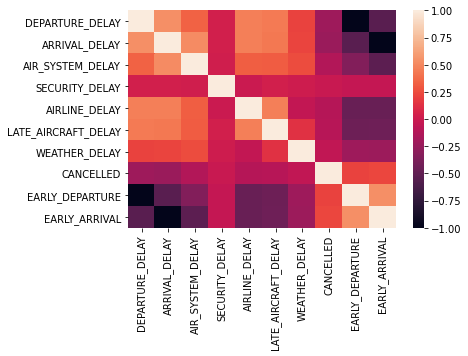

In [ ]:
sn.heatmap(data1)

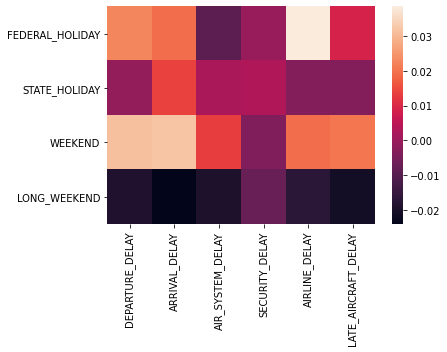

In [ ]:
df = pd.DataFrame(data2.corr(method = 'pearson'))
sn.heatmap(df[df.columns[4:]][0:4])